In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [103]:
df=pd.read_csv('advertising.csv')

The case study of Sales channel includes the detailed study of TV, radio and newspaper channel.
The company has to select proper sales channel to predict the right sales channel to generate good revenue. 

# this is regression type

In [104]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [105]:
df.shape

(200, 5)

In [106]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [107]:
# this is regression type

In [108]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [109]:
import plotly.express as px

# Univariant analaysis using scatter method

In [110]:
#px.scatter_3d(df,x='TV',y='radio',z='newspaper',color='sales')

In [111]:
#plt.scatter(df,df['sales'])
#plt.show()

(array([ 2.,  9., 20., 47., 35., 29., 22., 17., 12.,  7.]),
 array([ 1.6 ,  4.14,  6.68,  9.22, 11.76, 14.3 , 16.84, 19.38, 21.92,
        24.46, 27.  ]),
 <BarContainer object of 10 artists>)

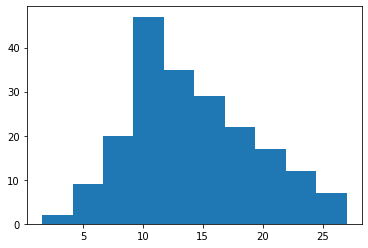

In [112]:
plt.hist(df['sales'])

the sales report of 10 is very high
the sales report of 0-5 is increased
the sales report of 20-25 is decresed

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [114]:
df=df.drop(['Unnamed: 0'],axis=1)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [116]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


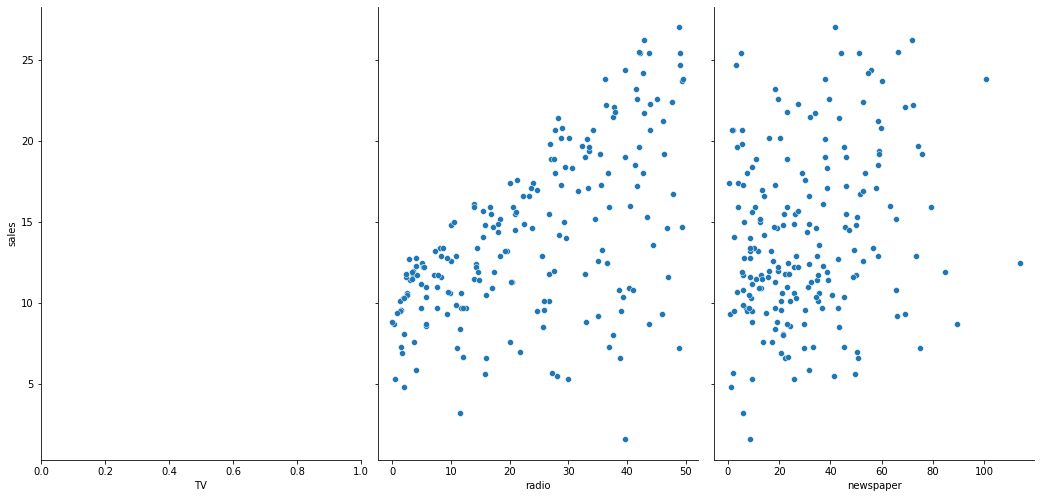

In [117]:
sns.pairplot(df,x_vars=['TV','radio','newspaper'],y_vars='sales',height=7,aspect=0.7)

C:\Users\jesus\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


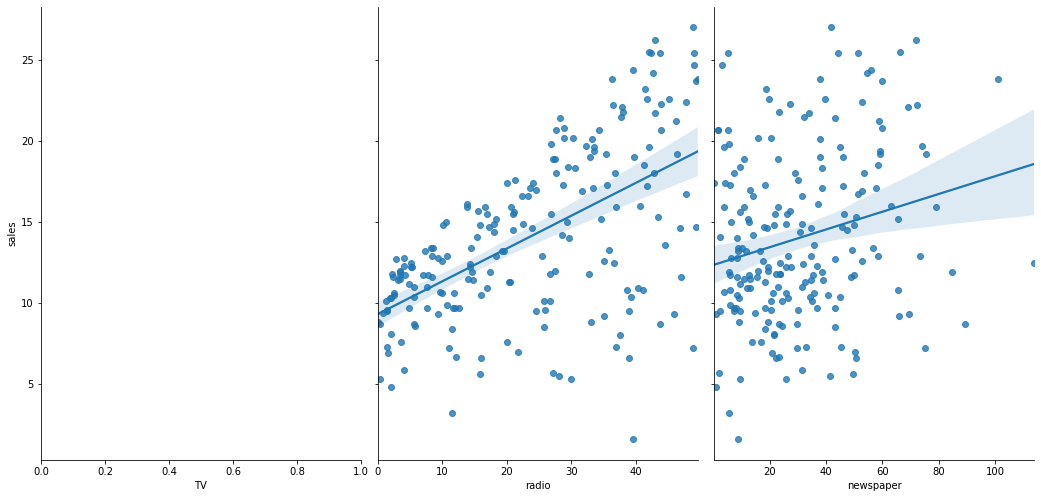

In [118]:
sns.pairplot(df,x_vars=df.columns[:3],y_vars=df.columns[3:],size=7,aspect=0.7,kind='reg')

radio which has lightly distrubuted
newspaper which has highly distrubed

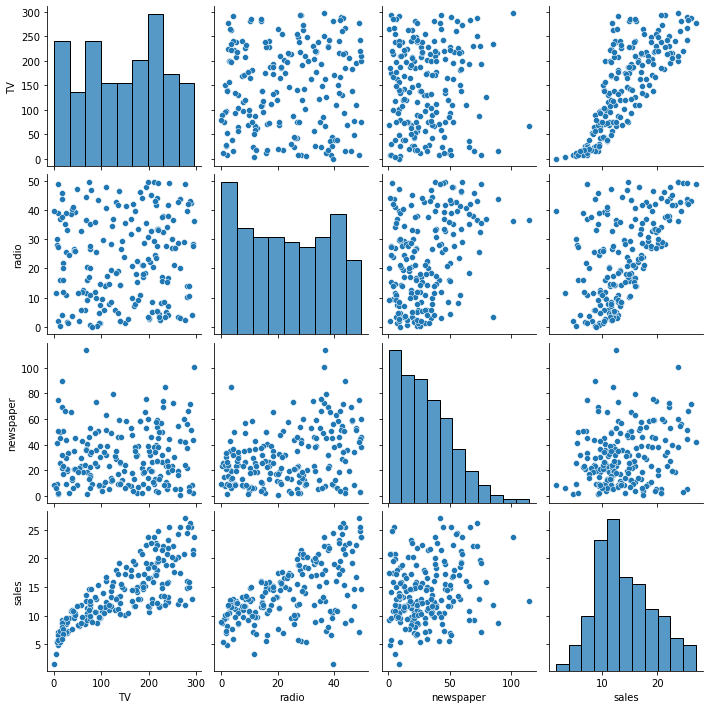

In [119]:
sns.pairplot(df)

news paper which has the right skewed 
sales which has the normal distrubed
tv which has the right skewed
radio which has the right skewed

<AxesSubplot:>

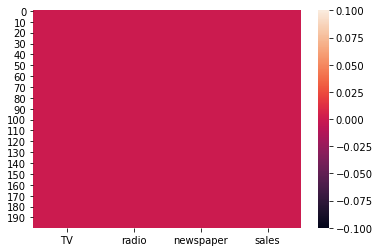

In [120]:
sns.heatmap(df.isnull())

In [121]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


Multi correlated value which has the sales and tv .78


In [122]:
corr_matrix=df.corr()
corr_matrix["sales"].sort_values(ascending=False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

sales which has the highly correlated
news paper which the last correlated

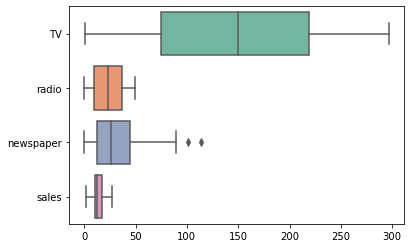

In [123]:
ax = sns.boxplot(data=df, orient="h", palette="Set2")

news paper which the outlier

In [124]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [125]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_new=df.loc[(z_score<3).all(axis=1)]
print(df_new.shape)

(200, 4)
(198, 4)


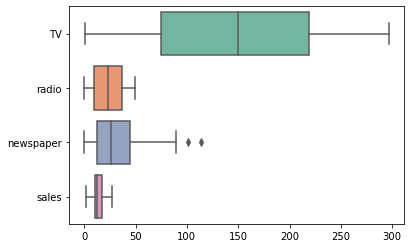

In [126]:
ax = sns.boxplot(data=df, orient="h", palette="Set2")

In [127]:
x=df.columns[:3]

In [128]:
x

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [129]:
y=df.columns[3:]

In [130]:
y

Index(['sales'], dtype='object')

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X=df[['TV','radio','newspaper']]
y=df.sales
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

lm4=LinearRegression()
lm4.fit(X_train,y_train)
lm4_preds=lm4.predict(X_test)


print("R^2:",r2_score(y_test,lm4_preds))

NameError: name 'r2_score' is not defined

In [132]:
#from sklearn.model_selection import train_test_split,cross_val_score
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import r2_score
#best_r_state=0
#accu=0

#for i in range(0,2):
 #   train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=i)
  #  mod=LinearRegression()
  #  mod.fit(train_x,train_y)
  #  pred_y=mod.predict(test_x)
  #  tempaccu=r2_score(test_y,pred_y)
  #  if tempaccu>accu:
   #     accu=tempaccu
    #    best_r_state=i

#print(f"Best random_state {best_r_state}")

In [133]:
print('error')

print('mean absolute error:',mean_absolute_error(y_test,lm4_preds))
print('mean absolute error:',mean_squared_error(y_test,lm4_preds))

print('root mean squard error:',np.sqrt(mean_squared_error(y_test,lm4_preds)))

error
mean absolute error: 1.0668917082595213
mean absolute error: 1.9730456202283384
root mean squard error: 1.4046514230328955


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor()
knn.fit(X_train,y_train)
knn_y=knn.predict(X_test)

print("Accuracy Score",r2_score(y_test,knn_y))

In [ ]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor


rfr=RandomForestRegressor(n_estimators=100,random_state=43)
abr=AdaBoostRegressor()
gbr=GradientBoostingRegressor()
gr = BaggingRegressor()
for val in [rfr,abr,gbr,gr]:
    val.fit(X_train,y_train)
    print(val, r2_score(y_test,val.predict(X_test)))

In [ ]:
model=[lm4,rfr,abr,gbr,gr,knn]

In [ ]:
model

In [ ]:
for m in model:
    score=cross_val_score(m,X,y,cv=5)
    print(score)
    print(score.mean(),score.std())

In [ ]:
parameters ={'max_depth':np.arange(2,15),
           'criterion':['gini','entropy']}

In [ ]:
rfr=RandomForestRegressor(n_estimators=100,random_state=43)

In [ ]:
GCV=GridSearchCV( rfr,parameters,cv=5)

In [ ]:
GCV.fit(X_train,y_train)

In [ ]:
GCV.best_params_

In [ ]:
GCV_pred=GCV.best_estimator_.predict(X_test)

In [ ]:
accuracy_score(y_test,GCV_pred)